In [289]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

%matplotlib inline

In [174]:
#import dataset

df = pd.read_csv(r"C:\Users\sharm\Documents\Vaibhav Personal Project\Credit-Risk-Analysis\bank-loan-status-dataset\credit_train.csv")




In [175]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [176]:
#check for credit scores greater than 850
ndf = df[df["Credit Score"]>850]
ndf.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0


In [177]:
#scale down all credit scores greater than 850 by factor of 10
df["Credit Score"] = df["Credit Score"].apply(lambda val: (val/10) if val>850 else val)

In [178]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [179]:
#about 500 values are null in Loan status

df[df["Loan Status"].isnull()].shape

(514, 19)

In [180]:
#drop the rows with Null Values
df.dropna(subset=["Loan Status"],inplace= True)

In [181]:
df[df["Loan Status"].isnull()].shape

(0, 19)

In [182]:
df.shape

(100000, 19)

In [183]:
#convert labels into encoded form 
enc = preprocessing.LabelEncoder()
df["Loan Status"] = enc.fit_transform(df["Loan Status"])

In [184]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


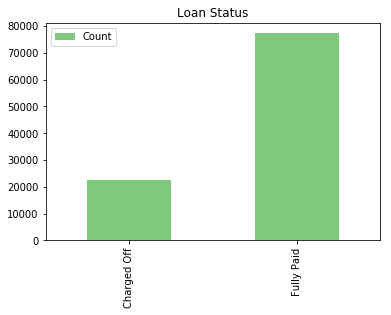

In [185]:
choffval = df[df["Loan Status"]==0]["Loan Status"].count()
fpaidval = df[df["Loan Status"]==1]["Loan Status"].count()

data = {"Count": [choffval,fpaidval]}
statusDF = pd.DataFrame(data,index = ["Charged Off","Fully Paid"])
#statusDF.head()
statusDF.plot(kind='bar',title="Loan Status",colormap = "Accent")

In [186]:
df["Term"].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [187]:
#encode the term column

df["Term"].replace(to_replace=["Short Term","Long Term"],value=[0,1],inplace = True)

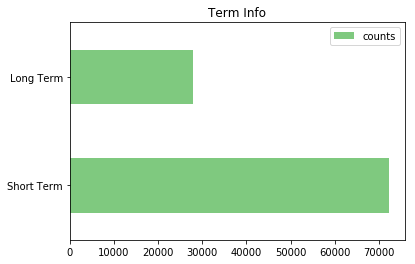

In [188]:
sterm = df[df["Term"] == 0]["Term"].count()
lterm = df[df["Term"] == 1]["Term"].count()
tdata = {"counts" : [sterm,lterm]}
termDF = pd.DataFrame(tdata, index=["Short Term","Long Term"])
termDF.plot(kind="barh",title="Term Info",colormap="Accent")

In [189]:
#check null values of credit score 
newDF = df[df["Credit Score"].notnull()]  #newDF with no NULL values
newDF.shape

(80846, 19)

In [190]:
#averaging out null values in credit score column
#for short term loans

cscoredf = df[df["Term"]==0]
stermAvg = cscoredf["Credit Score"].mean()
print(stermAvg)

724.6209386906824


In [191]:
#for long term loans

cscoredf = df[df["Term"]==1]
ltermAvg = cscoredf["Credit Score"].mean()
print(ltermAvg)

695.483727170432


In [192]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [193]:
#replace calculated averages in the main DataFrame
df.loc[(df.Term==0) & (df["Credit Score"].isnull()),"Credit Score"] = stermAvg
df.loc[(df.Term==1) & (df["Credit Score"].isnull()),"Credit Score"] = ltermAvg
df.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,724.620939,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.000000,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,724.620939,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,0,729.000000,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,0,730.000000,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714.0,1,695.483727,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,0,678.000000,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952.0,0,739.000000,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [194]:
#Categorizing Credit score into different ranges

df["Credit Score"] = df["Credit Score"].apply(lambda val: "Poor" if np.isreal(val) and val<580 else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Fair" if np.isreal(val) and (val>=580 and val<670) else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Good" if np.isreal(val) and (val>=670 and val<740) else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Very Good" if np.isreal(val) and (val>=740 and val<800) else val)
df["Credit Score"] = df["Credit Score"].apply(lambda val: "Exceptional" if np.isreal(val) and (val>=800 and val <=850) else val)


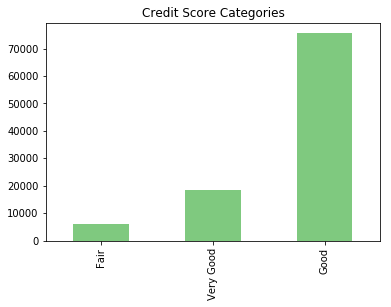

In [195]:
df["Credit Score"].value_counts().sort_values(ascending = True).plot(kind = "bar",title = "Credit Score Categories",colormap = "Accent")

In [196]:
#df.head()
#checking null values in Annual Income Column

df[df["Annual Income"].isnull()].shape

(19154, 19)

In [197]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [198]:
#replace by average income

incDF = df[df["Annual Income"].notnull()]
incAvg = incDF["Annual Income"].mean()
#print(incAvg) - 1378276.56
df.loc[(df["Annual Income"].isnull()),"Annual Income"] = incAvg
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [199]:
df["Annual Income"].dtypes

dtype('float64')

In [200]:
#changing Credit Score to One Hot encoded format

In [201]:
df = df.join(pd.get_dummies(df["Credit Score"],drop_first=True))
df.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,Good,1.167493e+06,8 years,Home Mortgage,Home Improvements,...,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,Good,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,...,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,Very Good,2.231892e+06,8 years,Own Home,Debt Consolidation,...,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,Good,8.069490e+05,3 years,Own Home,Debt Consolidation,...,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,Good,1.378277e+06,5 years,Rent,Debt Consolidation,...,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,0,Good,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,...,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,1,217646.0,0,Good,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,...,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,0,648714.0,1,Good,1.378277e+06,< 1 year,Home Mortgage,Buy House,...,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0,1,0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,1,548746.0,0,Good,2.559110e+06,2 years,Rent,Debt Consolidation,...,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,1,0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,1,215952.0,0,Good,1.454735e+06,< 1 year,Rent,Debt Consolidation,...,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0,1,0


In [202]:
df = df.drop(["Credit Score"],axis = 1)

In [203]:
df.Purpose.value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [204]:
loanpurposestatus = df[["Purpose","Loan Status"]]
loanpurposestatus.shape
                       

(100000, 2)

In [205]:
td = pd.crosstab(loanpurposestatus.Purpose,loanpurposestatus["Loan Status"])


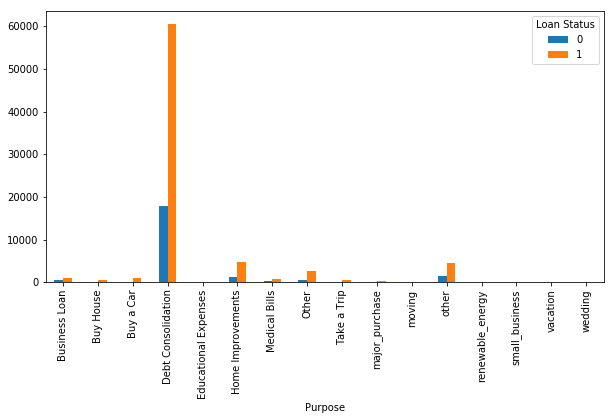

In [206]:
td.plot(kind = "bar",figsize=(10,5))

In [207]:
df["Home Ownership"].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [208]:
df = df.join(pd.get_dummies(df["Home Ownership"],drop_first=True))


In [209]:
df = df.drop(["Home Ownership"],axis=1)

In [210]:
#df.head()

In [211]:
df = df.drop(["Loan ID","Customer ID"],axis =1)

In [212]:
#df.head(50)

In [213]:
df["Years in current job"].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
n/a           4222
9 years       3955
Name: Years in current job, dtype: int64

In [214]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)

C:\Users\sharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [215]:
td = df[df["Years in current job"].notnull()]
tdAvg = td["Years in current job"].mean()
df["Years in current job"].fillna(np.round(tdAvg),inplace = True)

In [216]:
df["Emp history"] = df["Years in current job"].apply(lambda val: "Emp Junior" if val<4 else("Emp Mid" if val>=4 and val<8 else "Emp Senior"))

In [217]:
df = df.drop(["Years in current job"],axis =1)

In [218]:
df = df.join(pd.get_dummies(df["Emp history"],drop_first= True))

In [219]:
df = df.drop(["Emp history"],axis=1)

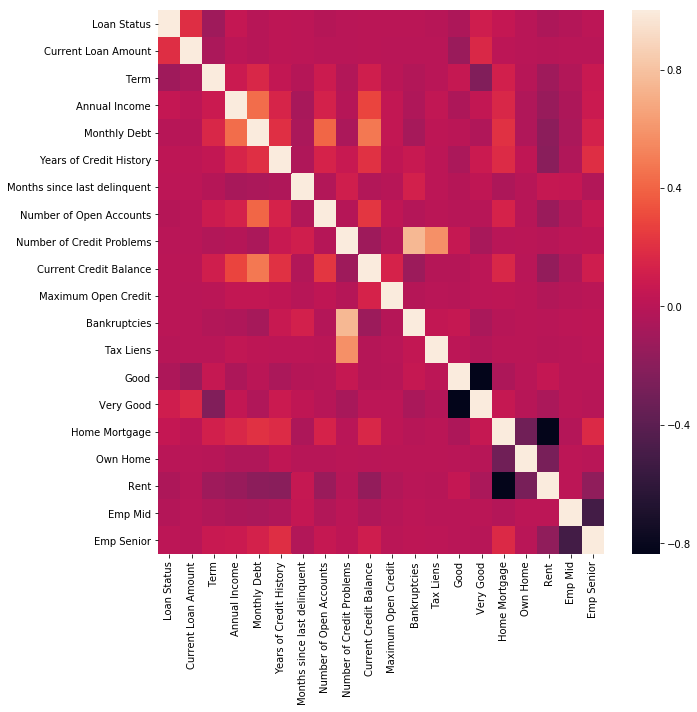

In [220]:
plt.figure(figsize=(10,10))
#df.columns
sns.heatmap(df.corr())

In [221]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior
0,1,445412.0,0,1.167493e+06,Home Improvements,5214.74,17.2,NaN,6.0,1.0,...,416746.0,1.0,0.0,1,0,1,0,0,0,1
1,1,262328.0,0,1.378277e+06,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,...,850784.0,0.0,0.0,1,0,1,0,0,0,1
2,1,99999999.0,0,2.231892e+06,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,...,750090.0,0.0,0.0,0,1,0,1,0,0,1
3,1,347666.0,1,8.069490e+05,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,...,386958.0,0.0,0.0,1,0,0,1,0,0,0
4,1,176220.0,0,1.378277e+06,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,...,427174.0,0.0,0.0,1,0,0,0,1,1,0


In [222]:
df[df["Months since last delinquent"].isnull()].shape



(53141, 21)

In [223]:
df[df["Months since last delinquent"].notnull()].shape

(46859, 21)

In [224]:
#remove this column due to large no of missing values
df = df.drop(["Months since last delinquent"],axis=1)

In [225]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior
0,1,445412.0,0,1.167493e+06,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,1
1,1,262328.0,0,1.378277e+06,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,1
2,1,99999999.0,0,2.231892e+06,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,1
3,1,347666.0,1,8.069490e+05,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,1,0,0,0
4,1,176220.0,0,1.378277e+06,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,0,0,1,1,0


In [226]:
df[df["Maximum Open Credit"].isnull()]

,Loan Status,Current Loan Amount,Term,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior
30180,0,32340.0,0,1.378277e+06,Debt Consolidation,9620.46,15.3,3.0,0.0,0.0,NaN,0.0,0.0,1,0,0,0,1,0,0
98710,0,45144.0,0,1.806995e+06,Debt Consolidation,36290.38,22.4,9.0,0.0,0.0,NaN,0.0,0.0,1,0,0,0,1,0,1


In [227]:
#Since No. of Values is very low we drop these rows
df = df.drop(df["Maximum Open Credit"].isnull(),axis=0)


In [228]:
df.shape

(99998, 20)

In [229]:
df[df["Tax Liens"].isnull()].shape


(10, 20)

In [230]:
for i in df['Tax Liens'][df['Tax Liens'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [231]:
df.shape

(99988, 20)

In [232]:
df[df["Bankruptcies"].isnull()].shape

(194, 20)

In [233]:
for i in df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [234]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior
2,1,99999999.0,0,2.231892e+06,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,1,0,0,1
3,1,347666.0,1,8.069490e+05,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,1,0,0,0
4,1,176220.0,0,1.378277e+06,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,0,0,1,1,0
5,0,206602.0,0,8.968570e+05,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,1,0,0,0,1
6,1,217646.0,0,1.184194e+06,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,1,0,1,0,0,0,0


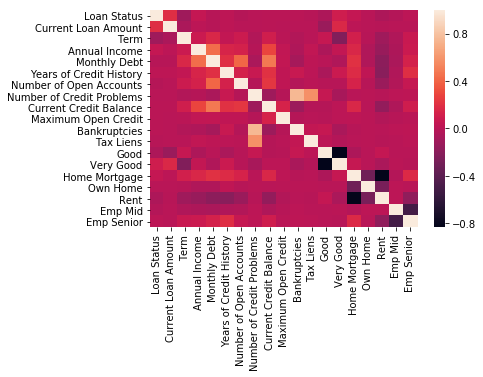

In [235]:
 sns.heatmap(df.corr())

In [236]:
corr_Data = df.corr()

In [237]:
corr_Data

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior
Loan Status,1.000000,0.194583,-0.110851,0.046695,-0.008037,0.023644,-0.012149,-0.002341,0.009363,0.008215,0.006573,-0.010243,-0.053079,0.097773,0.050179,-0.001835,-0.050542,-0.018779,0.012887
Current Loan Amount,0.194583,1.000000,-0.059036,0.013076,-0.006573,0.019303,0.001677,-0.002826,0.003997,-0.001127,-0.000601,-0.002039,-0.131298,0.161553,0.011292,-0.002500,-0.010233,-0.003158,-0.000483
Term,-0.110851,-0.059036,1.000000,0.078246,0.158197,0.042048,0.082508,-0.026508,0.104867,0.008638,-0.028946,-0.003569,0.060043,-0.239730,0.116339,-0.010417,-0.109681,-0.032701,0.071630
Annual Income,0.046695,0.013076,0.078246,1.000000,0.438555,0.144905,0.131590,-0.015487,0.284281,0.038990,-0.043113,0.037079,-0.053374,0.044862,0.158596,-0.036325,-0.139350,-0.048250,0.079846
Monthly Debt,-0.008037,-0.006573,0.158197,0.438555,1.000000,0.199748,0.411164,-0.055724,0.480992,0.039532,-0.078951,0.020025,0.002655,-0.037149,0.206354,-0.036824,-0.187345,-0.057226,0.131863
Years of Credit History,0.023644,0.019303,0.042048,0.144905,0.199748,1.000000,0.132222,0.061891,0.208429,0.030742,0.066254,0.017345,-0.054829,0.079725,0.179682,0.030084,-0.199678,-0.035504,0.190542
Number of Open Accounts,-0.012149,0.001677,0.082508,0.131590,0.411164,0.132222,1.000000,-0.014144,0.227821,0.030987,-0.024537,0.006506,-0.006734,-0.005016,0.133805,-0.009708,-0.129185,-0.027757,0.056147
Number of Credit Problems,-0.002341,-0.002826,-0.026508,-0.015487,-0.055724,0.061891,-0.014144,1.000000,-0.112697,-0.012011,0.752933,0.581363,0.058580,-0.069585,0.000034,0.009668,-0.006111,0.014617,0.024190
Current Credit Balance,0.009363,0.003997,0.104867,0.284281,0.480992,0.208429,0.227821,-0.112697,1.000000,0.138464,-0.122603,-0.015675,-0.017009,0.010798,0.158599,0.001998,-0.161273,-0.043302,0.100455
Maximum Open Credit,0.008215,-0.001127,0.008638,0.038990,0.039532,0.030742,0.030987,-0.012011,0.138464,1.000000,-0.014573,-0.001022,-0.011012,0.015313,0.021445,0.006611,-0.026395,-0.003931,0.003991


In [238]:
corr_Data["Loan Status"].sort_values(ascending=False)

Loan Status                  1.000000
Current Loan Amount          0.194583
Very Good                    0.097773
Home Mortgage                0.050179
Annual Income                0.046695
Years of Credit History      0.023644
Emp Senior                   0.012887
Current Credit Balance       0.009363
Maximum Open Credit          0.008215
Bankruptcies                 0.006573
Own Home                    -0.001835
Number of Credit Problems   -0.002341
Monthly Debt                -0.008037
Tax Liens                   -0.010243
Number of Open Accounts     -0.012149
Emp Mid                     -0.018779
Rent                        -0.050542
Good                        -0.053079
Term                        -0.110851
Name: Loan Status, dtype: float64

In [239]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Good', 'Very Good', 'Home Mortgage', 'Own Home', 'Rent',
       'Emp Mid', 'Emp Senior'],
      dtype='object')

In [240]:
#one hot encode purpose column
df = df.join(pd.get_dummies(df["Purpose"],drop_first= True))

In [241]:
df = df.drop(["Purpose"],axis =1)

In [242]:
df["Number of Credit Problems"].value_counts()

0.0     85838
1.0     12068
2.0      1299
3.0       378
4.0       125
5.0        49
6.0        17
7.0         8
8.0         4
9.0         2
11.0        2
10.0        2
15.0        1
12.0        1
Name: Number of Credit Problems, dtype: int64

In [243]:
df['Credit Problems'] = df['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit problem" if x>0 and x<5 else "Major Credit Problems"))

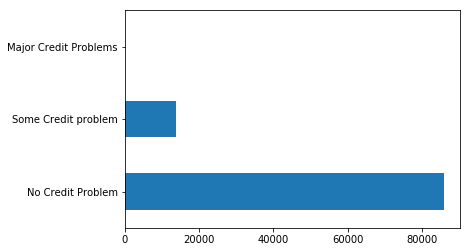

In [244]:
df['Credit Problems'].value_counts().plot(kind="barh")

In [245]:
df = df.join(pd.get_dummies(df['Credit Problems'],drop_first = True))


In [246]:
df = df.drop(['Credit Problems','Number of Credit Problems'],axis=1)

In [247]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding,No Credit Problem,Some Credit problem
2,1,99999999.0,0,2.231892e+06,29200.53,14.9,18.0,297996.0,750090.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,1,347666.0,1,8.069490e+05,8741.90,12.0,9.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1,176220.0,0,1.378277e+06,20639.70,6.1,15.0,253460.0,427174.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5,0,206602.0,0,8.968570e+05,16367.74,17.3,6.0,215308.0,272448.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,1,217646.0,0,1.184194e+06,10855.08,19.6,13.0,122170.0,272052.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [248]:
df['Credit Age'] = df['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [249]:
df = df.join(pd.get_dummies(df['Credit Age'],drop_first=True))

In [250]:
df = df.drop(['Credit Age','Years of Credit History'],axis=1)

In [251]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,...,moving,other,renewable_energy,small_business,vacation,wedding,No Credit Problem,Some Credit problem,Good Credit Age,Short Credit Age
2,1,99999999.0,0,2.231892e+06,29200.53,18.0,297996.0,750090.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,1,347666.0,1,8.069490e+05,8741.90,9.0,256329.0,386958.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,20639.70,15.0,253460.0,427174.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
5,0,206602.0,0,8.968570e+05,16367.74,6.0,215308.0,272448.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
6,1,217646.0,0,1.184194e+06,10855.08,13.0,122170.0,272052.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


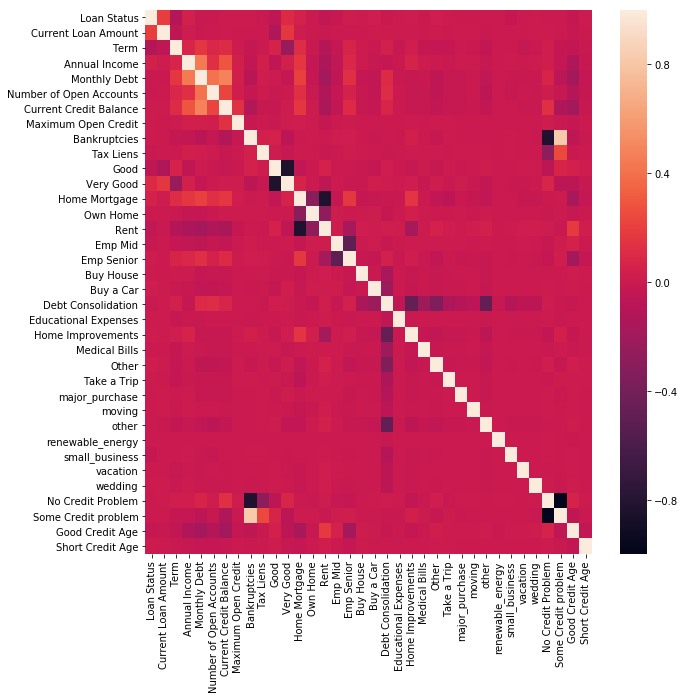

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [253]:
df = df.drop(['Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

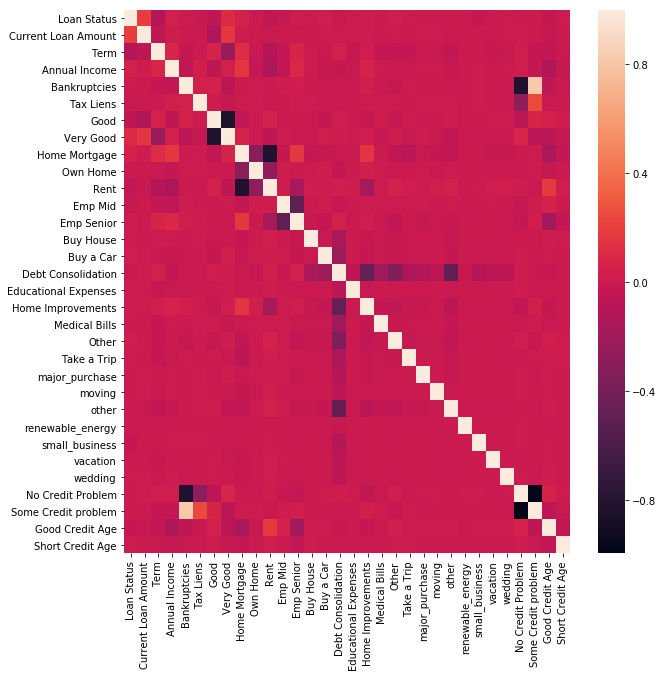

In [258]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [259]:
df['Tax Liens'] = df['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [260]:
df = df.join(pd.get_dummies(df['Tax Liens'],drop_first = True))


In [261]:
df = df.drop(['Tax Liens'],axis=1)


In [262]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Good,Very Good,Home Mortgage,Own Home,Rent,...,renewable_energy,small_business,vacation,wedding,No Credit Problem,Some Credit problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
2,1,99999999.0,0,2.231892e+06,0.0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,1,347666.0,1,8.069490e+05,0.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,1,176220.0,0,1.378277e+06,0.0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
5,0,206602.0,0,8.968570e+05,0.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
6,1,217646.0,0,1.184194e+06,1.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [263]:
df['Bankruptcies'] = df['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [264]:
df = df.join(pd.get_dummies(df['Bankruptcies'],drop_first = True))


In [ ]:
df = df.drop(['Bankruptcies'],axis=1)


In [269]:
df.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,...,vacation,wedding,No Credit Problem,Some Credit problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
count,99794.000000,9.979400e+04,99794.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,...,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000
mean,0.773644,1.175727e+07,0.278494,1.378333e+06,0.755186,0.184610,0.484318,0.091809,0.421739,0.284396,...,0.001012,0.001122,0.860152,0.138986,0.498888,0.001944,0.980680,0.017205,0.889562,0.109135
std,0.418474,3.177985e+07,0.448260,9.719146e+05,0.429979,0.387983,0.499757,0.288758,0.493840,0.451128,...,0.031797,0.033482,0.346831,0.345934,0.500001,0.044048,0.137647,0.130037,0.313436,0.311810
min,0.000000,1.542200e+04,0.000000,7.662700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.796960e+05,0.000000,9.312470e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,3.124660e+05,0.000000,1.370052e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,5.250960e+05,1.000000,1.512922e+06,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000e+08,1.000000,1.655574e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [271]:
#define outlines for income

meanxoutlier = df[df['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = df[df['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [272]:
df['Annual Income'] = df['Annual Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))

In [273]:
df = df.join(pd.get_dummies(df['Annual Income'],drop_first = True))


In [274]:
df = df.drop(['Annual Income'],axis=1)

In [275]:
df.head()

,Loan Status,Current Loan Amount,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior,...,No Credit Problem,Some Credit problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income
2,1,99999999.0,0,0,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
3,1,347666.0,1,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
4,1,176220.0,0,1,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
5,0,206602.0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
6,1,217646.0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [276]:
lmeanxoutlier = df[df['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = df[df['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126203.59595880186 498796.20688711776


In [277]:
df['Current Loan Amount'] = df['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [278]:
df = df.join(pd.get_dummies(df['Current Loan Amount'],drop_first = True))

In [279]:
df = df.drop(['Current Loan Amount'], axis=1)


In [284]:
df.shape

(99794, 36)

In [285]:
df.head()

,Loan Status,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Mid,Emp Senior,Buy House,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
2,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
5,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
6,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [281]:
Y = df['Loan Status']
X = df.drop(['Loan Status'],axis=1)

In [282]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Score:  0.772003072915


FINISHED classifying. accuracy score : 
0.766825879288


In [295]:
def cross_val(X_train, Y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, Y_train, model)
    
    # Return the performance metric
    return model_cross

In [296]:
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print("Score: ",logr_cross)


Score:  0.774532957136


In [297]:
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.7651


In [300]:
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

ModuleNotFoundError: No module named 'xgboost'